In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon 
import matplotlib.mlab as mlab
import scipy.stats
import seaborn as sns
sns.set()

%matplotlib inline

# Laden des Datensatzes "breastcancer" aus Kaggle

In [2]:
#df = pd.read_csv("C:/Users/Ulrike/Desktop/Big Data/Projekt/breastcancer.csv")
df = pd.read_csv("C:/Users/Alfa/Desktop/Projekt/data.csv")
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')


#df.diagnosis.replace(to_replace=dict(M=1, B=0),inplace=True)

df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,unnamed:_32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
del df['unnamed:_32']
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
#x = df.diagnosis

In [5]:
for col in df.columns:
    if df[col].dtype in [np.float64]:
       # pass
        print(col)
        #df[col] = df[col] - df[col].mean()
#x.isna().sum()

radius_mean
texture_mean
perimeter_mean
area_mean
smoothness_mean
compactness_mean
concavity_mean
concave_points_mean
symmetry_mean
fractal_dimension_mean
radius_se
texture_se
perimeter_se
area_se
smoothness_se
compactness_se
concavity_se
concave_points_se
symmetry_se
fractal_dimension_se
radius_worst
texture_worst
perimeter_worst
area_worst
smoothness_worst
compactness_worst
concavity_worst
concave_points_worst
symmetry_worst
fractal_dimension_worst


In [6]:
#df.dtypes

Datensatz reduzieren für die Normalisierung der Daten, damit man nicht mit physikalischen Größen arbeitet.

In [7]:
new_df = df.iloc[:,2:]
new_df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890
1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
2,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758
3,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300
4,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
5,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,0.2087,0.07613,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
6,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,0.1794,0.05742,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368
7,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,0.2196,0.07451,...,17.060,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510
8,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,0.2350,0.07389,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
9,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,0.2030,0.08243,...,15.090,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750


# Normalisierung der Daten
(X(w) - Mittelwert(X(w))))/Standardabweichung(X(w)) 

In [8]:
normalized_df=(df.iloc[:,2:]-df.iloc[:,2:].mean())/df.iloc[:,2:].std()

In [9]:
normalized_df.head(10)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,2.215566,2.253764,...,1.885031,-1.358098,2.301575,1.999478,1.306537,2.614365,2.107672,2.294058,2.748204,1.935312
1,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,0.001391,-0.867889,...,1.804340,-0.368879,1.533776,1.888827,-0.375282,-0.430066,-0.146620,1.086129,-0.243675,0.280943
2,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,-0.397658,...,1.510541,-0.023953,1.346291,1.455004,0.526944,1.081980,0.854222,1.953282,1.151242,0.201214
3,-0.768233,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.914213,1.450431,2.864862,4.906602,...,-0.281217,0.133866,-0.249720,-0.549538,3.391291,3.889975,1.987839,2.173873,6.040726,4.930672
4,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,-0.009552,-0.561956,...,1.297434,-1.465481,1.337363,1.219651,0.220362,-0.313119,0.612640,0.728618,-0.867590,-0.396751
5,-0.475956,-0.834601,-0.386808,-0.505206,2.235455,1.243242,0.865540,0.823931,1.004518,1.888343,...,-0.165353,-0.313560,-0.114908,-0.244105,2.046712,1.720103,1.262133,0.905091,1.752527,2.239831
6,1.169878,0.160508,1.137124,1.094332,-0.123028,0.088218,0.299809,0.646366,-0.064268,-0.761662,...,1.367780,0.322599,1.367122,1.274098,0.518184,0.021196,0.509104,1.195664,0.262245,-0.014718
7,-0.118413,0.358135,-0.072803,-0.218772,1.602639,1.139100,0.060972,0.281702,1.402121,1.658894,...,0.163619,0.400695,0.099361,0.028834,1.446688,0.724148,-0.021035,0.623647,0.477221,1.724917
8,-0.319885,0.588312,-0.183919,-0.383870,2.199903,1.682529,1.218025,1.149680,1.963872,1.571079,...,-0.161215,0.822090,-0.031581,-0.248145,1.661295,1.816711,1.278909,1.390393,2.387756,1.287517
9,-0.473118,1.104467,-0.329192,-0.508616,1.581308,2.561105,1.737343,0.940932,0.796597,2.780649,...,-0.243975,2.440961,-0.286026,-0.297148,2.318256,5.108382,3.991920,1.618591,2.368360,6.840837


In [10]:
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


# Test ob Normalisierung stimmt



In [11]:
X=np.mean(df.smoothness_mean)

In [12]:
Y=np.std(df.smoothness_mean)

In [13]:
X

0.096360281195079

In [14]:
Y

0.014051764066591203

In [15]:
Z= (df.smoothness_mean - X)

In [16]:
Z/Y

0      1.568466
1     -0.826962
2      0.942210
3      3.283553
4      0.280372
5      2.237421
6     -0.123136
7      1.604049
8      2.201839
9      1.582699
10    -1.017686
11     0.052642
12     0.073992
13    -0.878913
14     1.191289
15     1.248222
16     0.164372
17     1.468835
18     0.138753
19     0.101747
20     0.792763
21     0.429819
22     0.778530
23    -0.148044
24     1.120124
25     1.582699
26     0.643316
27    -0.139504
28     0.842579
29     0.150139
         ...   
539   -0.688901
540    0.247636
541   -0.568632
542   -0.968582
543   -0.686767
544   -0.041296
545   -0.277565
546   -0.143774
547   -0.540166
548   -0.814864
549   -1.027649
550   -1.569218
551   -0.049836
552   -0.967870
553   -0.281835
554   -1.076753
555   -0.431283
556    0.280372
557   -1.076753
558   -0.827674
559   -0.266890
560    0.208495
561   -1.556408
562    0.600616
563    0.963560
564    1.041842
565    0.102458
566   -0.840484
567    1.525767
568   -3.112085
Name: smoothness_mean, L


jippie es klappt :D

# Hinzufügen der Spalten "id" und "diagnosis"

In [17]:
normalized_df['Id']=df.iloc[:,0]

In [18]:
normalized_df['diagnosis']=df.iloc[:,1]
#normalized_df.diagnosis.replace(to_replace=dict(M=1, B=0),inplace=True)

In [19]:
normalized_df.head(10)


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,Id,diagnosis
0,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,2.215566,2.253764,...,2.301575,1.999478,1.306537,2.614365,2.107672,2.294058,2.748204,1.935312,842302,M
1,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,0.001391,-0.867889,...,1.533776,1.888827,-0.375282,-0.430066,-0.146620,1.086129,-0.243675,0.280943,842517,M
2,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,-0.397658,...,1.346291,1.455004,0.526944,1.081980,0.854222,1.953282,1.151242,0.201214,84300903,M
3,-0.768233,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.914213,1.450431,2.864862,4.906602,...,-0.249720,-0.549538,3.391291,3.889975,1.987839,2.173873,6.040726,4.930672,84348301,M
4,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,-0.009552,-0.561956,...,1.337363,1.219651,0.220362,-0.313119,0.612640,0.728618,-0.867590,-0.396751,84358402,M
5,-0.475956,-0.834601,-0.386808,-0.505206,2.235455,1.243242,0.865540,0.823931,1.004518,1.888343,...,-0.114908,-0.244105,2.046712,1.720103,1.262133,0.905091,1.752527,2.239831,843786,M
6,1.169878,0.160508,1.137124,1.094332,-0.123028,0.088218,0.299809,0.646366,-0.064268,-0.761662,...,1.367122,1.274098,0.518184,0.021196,0.509104,1.195664,0.262245,-0.014718,844359,M
7,-0.118413,0.358135,-0.072803,-0.218772,1.602639,1.139100,0.060972,0.281702,1.402121,1.658894,...,0.099361,0.028834,1.446688,0.724148,-0.021035,0.623647,0.477221,1.724917,84458202,M
8,-0.319885,0.588312,-0.183919,-0.383870,2.199903,1.682529,1.218025,1.149680,1.963872,1.571079,...,-0.031581,-0.248145,1.661295,1.816711,1.278909,1.390393,2.387756,1.287517,844981,M
9,-0.473118,1.104467,-0.329192,-0.508616,1.581308,2.561105,1.737343,0.940932,0.796597,2.780649,...,-0.286026,-0.297148,2.318256,5.108382,3.991920,1.618591,2.368360,6.840837,84501001,M


# Alternative Variante, um nicht die Spalten entfernen und wieder hinzufügen zu müssen

In [20]:
#import numpy as np

#cols = list(df.iloc[:,2:])
#cols.remove('id')
#cols.remove('diagnosis')
#df[cols].head()

#df_normalized = df
#df_normalized.head()

#Now iterate over the remaining columns and create a new z-score column
#for col in cols:
#    col_zscore = col + '_zscore'
#    df_normalized[col] = (df[col] - df[col].mean())/df[col].std(ddof=0)

    
#df_normalized.head()


In [21]:
df.copy()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890
1,842517,M,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
2,84300903,M,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758
3,84348301,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300
4,84358402,M,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
5,843786,M,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
6,844359,M,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368
7,84458202,M,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,...,17.060,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510
8,844981,M,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
9,84501001,M,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,...,15.090,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750


# Plotten der Ursprünglichen Daten vs. normalized-Data 
!!!Skalal ändert sich!!!

In [22]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


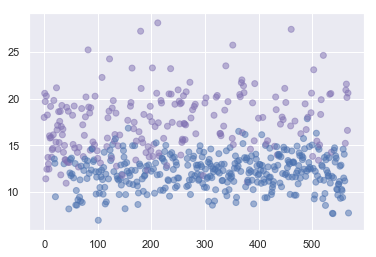

In [23]:
plt.scatter(x=df.index,y=df.radius_mean, color = df.diagnosis, alpha=0.5)
plt.show()

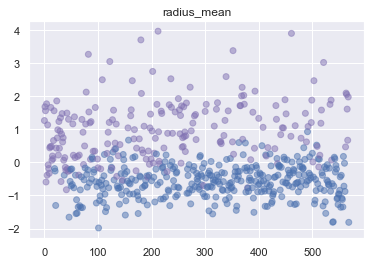

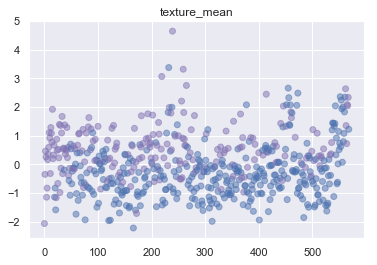

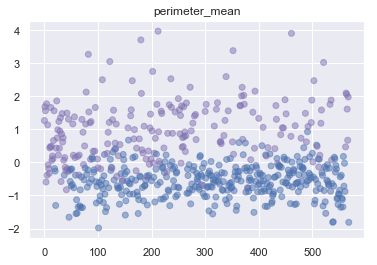

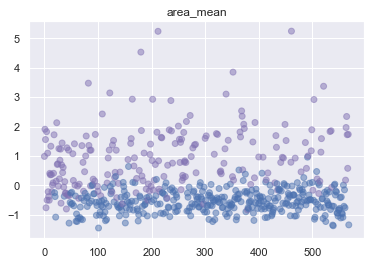

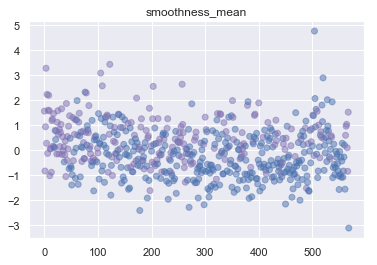

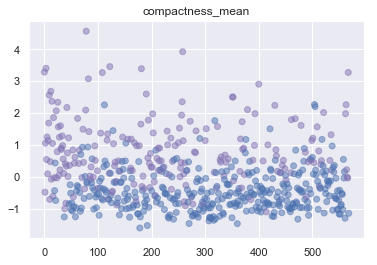

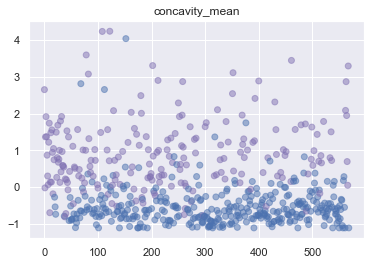

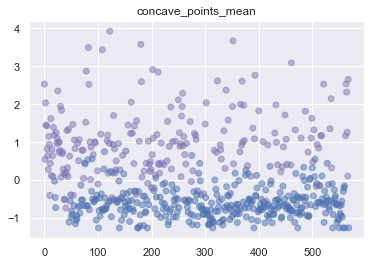

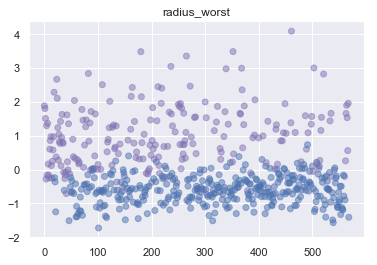

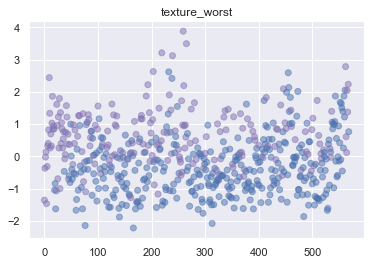

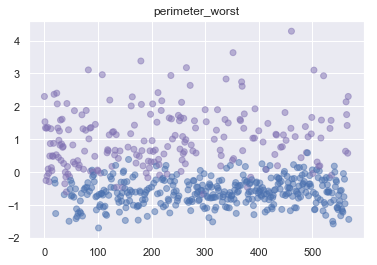

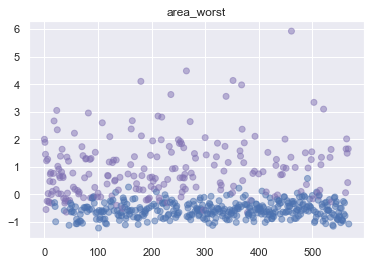

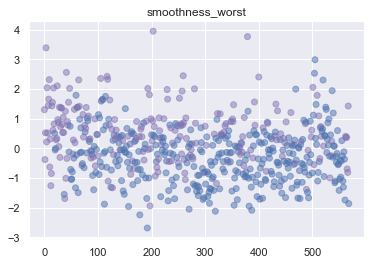

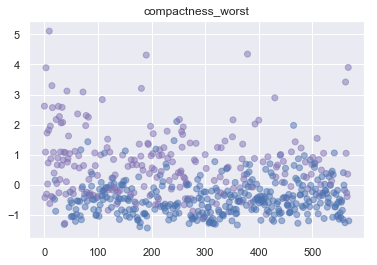

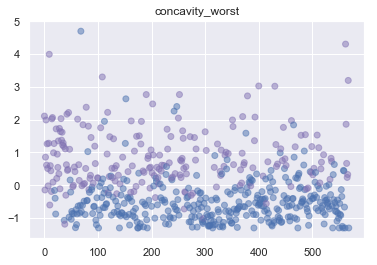

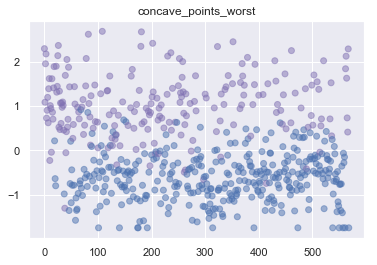

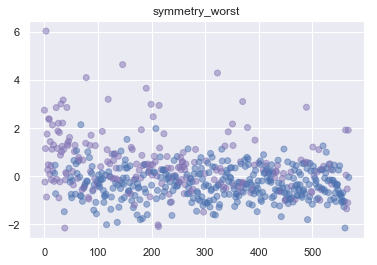

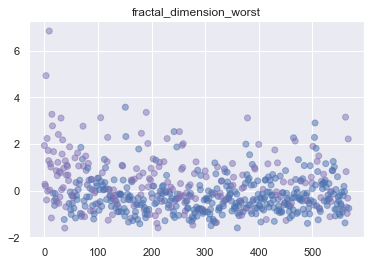

In [24]:
plt.scatter(x=normalized_df.index,y=normalized_df.iloc[:,2], color = normalized_df.diagnosis, alpha=0.5)
plt.title('radius_mean')
plt.show()

plt.scatter(x=normalized_df.index,y=normalized_df.texture_mean, color = normalized_df.diagnosis, alpha=0.5)
plt.title('texture_mean')
plt.show()

plt.scatter(x=normalized_df.index,y=normalized_df.perimeter_mean, color = normalized_df.diagnosis, alpha=0.5)
plt.title('perimeter_mean')
plt.show()

plt.scatter(x=normalized_df.index,y=normalized_df.area_mean, color = normalized_df.diagnosis, alpha=0.5)
plt.title('area_mean')
plt.show()

plt.scatter(x=normalized_df.index,y=normalized_df.smoothness_mean, color = normalized_df.diagnosis, alpha=0.5)
plt.title('smoothness_mean')
plt.show()

plt.scatter(x=normalized_df.index,y=normalized_df.compactness_mean, color = normalized_df.diagnosis, alpha=0.5)
plt.title('compactness_mean')
plt.show()

plt.scatter(x=normalized_df.index,y=normalized_df.concavity_mean, color = normalized_df.diagnosis, alpha=0.5)
plt.title('concavity_mean')
plt.show()

plt.scatter(x=normalized_df.index,y=normalized_df.concave_points_mean, color = normalized_df.diagnosis, alpha=0.5)
plt.title('concave_points_mean')
plt.show()

plt.scatter(x=normalized_df.index,y=normalized_df.radius_worst, color = normalized_df.diagnosis, alpha=0.5)
plt.title('radius_worst')
plt.show()

plt.scatter(x=normalized_df.index,y=normalized_df.texture_worst, color = normalized_df.diagnosis, alpha=0.5)
plt.title('texture_worst')
plt.show()

plt.scatter(x=normalized_df.index,y=normalized_df.perimeter_worst, color = normalized_df.diagnosis, alpha=0.5)
plt.title('perimeter_worst')
plt.show()

plt.scatter(x=normalized_df.index,y=normalized_df.area_worst, color = normalized_df.diagnosis, alpha=0.5)
plt.title('area_worst')
plt.show()

plt.scatter(x=normalized_df.index,y=normalized_df.smoothness_worst, color = normalized_df.diagnosis, alpha=0.5)
plt.title('smoothness_worst')
plt.show()

plt.scatter(x=normalized_df.index,y=normalized_df.compactness_worst, color = normalized_df.diagnosis, alpha=0.5)
plt.title('compactness_worst')
plt.show()

plt.scatter(x=normalized_df.index,y=normalized_df.concavity_worst, color = normalized_df.diagnosis, alpha=0.5)
plt.title('concavity_worst')
plt.show()

plt.scatter(x=normalized_df.index,y=normalized_df.concave_points_worst, color = normalized_df.diagnosis, alpha=0.5)
plt.title('concave_points_worst')
plt.show()

plt.scatter(x=normalized_df.index,y=normalized_df.symmetry_worst, color = normalized_df.diagnosis, alpha=0.5)
plt.title('symmetry_worst')
plt.show()

plt.scatter(x=normalized_df.index,y=normalized_df.fractal_dimension_worst, color = normalized_df.diagnosis, alpha=0.5)
plt.title('fractal_dimension_worst')
plt.show()

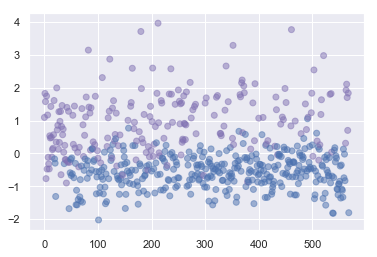

In [25]:
plt.scatter(x=normalized_df.index,y=normalized_df.radius_mean, color = normalized_df.diagnosis, alpha=0.5)
plt.show()

In [26]:
#g = sns.pairplot(df.iloc[:,1:32], hue='diagnosis')

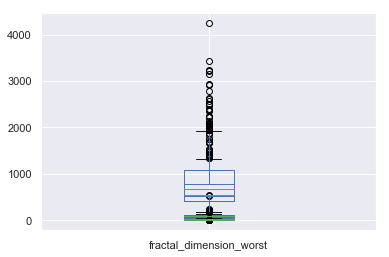

In [27]:
for col in df.columns:
    if df[col].dtype in [np.float64]:
        df[col].plot(kind ='box')

In [28]:
fig = plt.figure()
ax = plt.subplot(10,1)
for i in range(10):
    ax.boxplot(df.ix[:,i].values, positions = [i])    
#ax.set_xlim(-0.5, 9.5)
plt.show()

ValueError: Illegal argument(s) to subplot: (10, 1)

<Figure size 432x288 with 0 Axes>

In [ ]:
#fig, axs = plt.subplots(2, 3, df[2:8],'box')

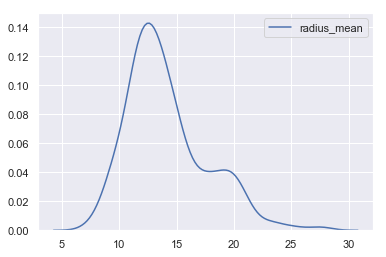

In [29]:
sns.kdeplot(df.radius_mean)

## RandomForest


In [30]:
#normalized_df.diagnosis.replace(to_replace=dict(M=1, B=0),inplace=True) # diagnosis in 0 und 1 konvertieren


#X = normalized_df.iloc[:, 0:29].values #datensatz für descision-trees
#y = normalized_df.iloc[:, 30].values #Zielfunktion diagnosis 

y = normalized_df['diagnosis']
X = normalized_df.drop(columns = ['diagnosis', 'Id'])

In [31]:
#Convert categorical variable to 0/1-coding
y = (y == 'B')

In [32]:
pd.get_dummies(df.diagnosis, drop_first = False).head() #Funktion zur Konvertierung

,B,M
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [33]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,2.215566,2.253764,...,1.885031,-1.358098,2.301575,1.999478,1.306537,2.614365,2.107672,2.294058,2.748204,1.935312
1,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,0.001391,-0.867889,...,1.804340,-0.368879,1.533776,1.888827,-0.375282,-0.430066,-0.146620,1.086129,-0.243675,0.280943
2,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,-0.397658,...,1.510541,-0.023953,1.346291,1.455004,0.526944,1.081980,0.854222,1.953282,1.151242,0.201214
3,-0.768233,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.914213,1.450431,2.864862,4.906602,...,-0.281217,0.133866,-0.249720,-0.549538,3.391291,3.889975,1.987839,2.173873,6.040726,4.930672
4,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,-0.009552,-0.561956,...,1.297434,-1.465481,1.337363,1.219651,0.220362,-0.313119,0.612640,0.728618,-0.867590,-0.396751


In [34]:
y.head()

0    False
1    False
2    False
3    False
4    False
Name: diagnosis, dtype: bool

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [36]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [37]:
#Use Logistic Regression as Benchmark!

In [38]:
y[:20]

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19     True
Name: diagnosis, dtype: bool

In [64]:


classifier = RandomForestClassifier(n_estimators=200, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)




In [58]:
#Accuracy
sum((y_test == y_pred)) / len(y_test)

0.9649122807017544

In [77]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.9649122807017544

In [78]:
metrics.confusion_matrix(y_test, y_pred)

array([[46,  1],
       [ 3, 64]], dtype=int64)

In [79]:
y.mean()

0.6274165202108963

In [80]:
y_pred[:10]

array([False,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [81]:
#from sklearn import metrics
#errors = np.abs(y_pred - y_test)
#print(errors)
#print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
#print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
#print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [82]:
from sklearn import metrics

In [83]:
metrics.accuracy_score

<function sklearn.metrics.classification.accuracy_score(y_true, y_pred, normalize=True, sample_weight=None)>

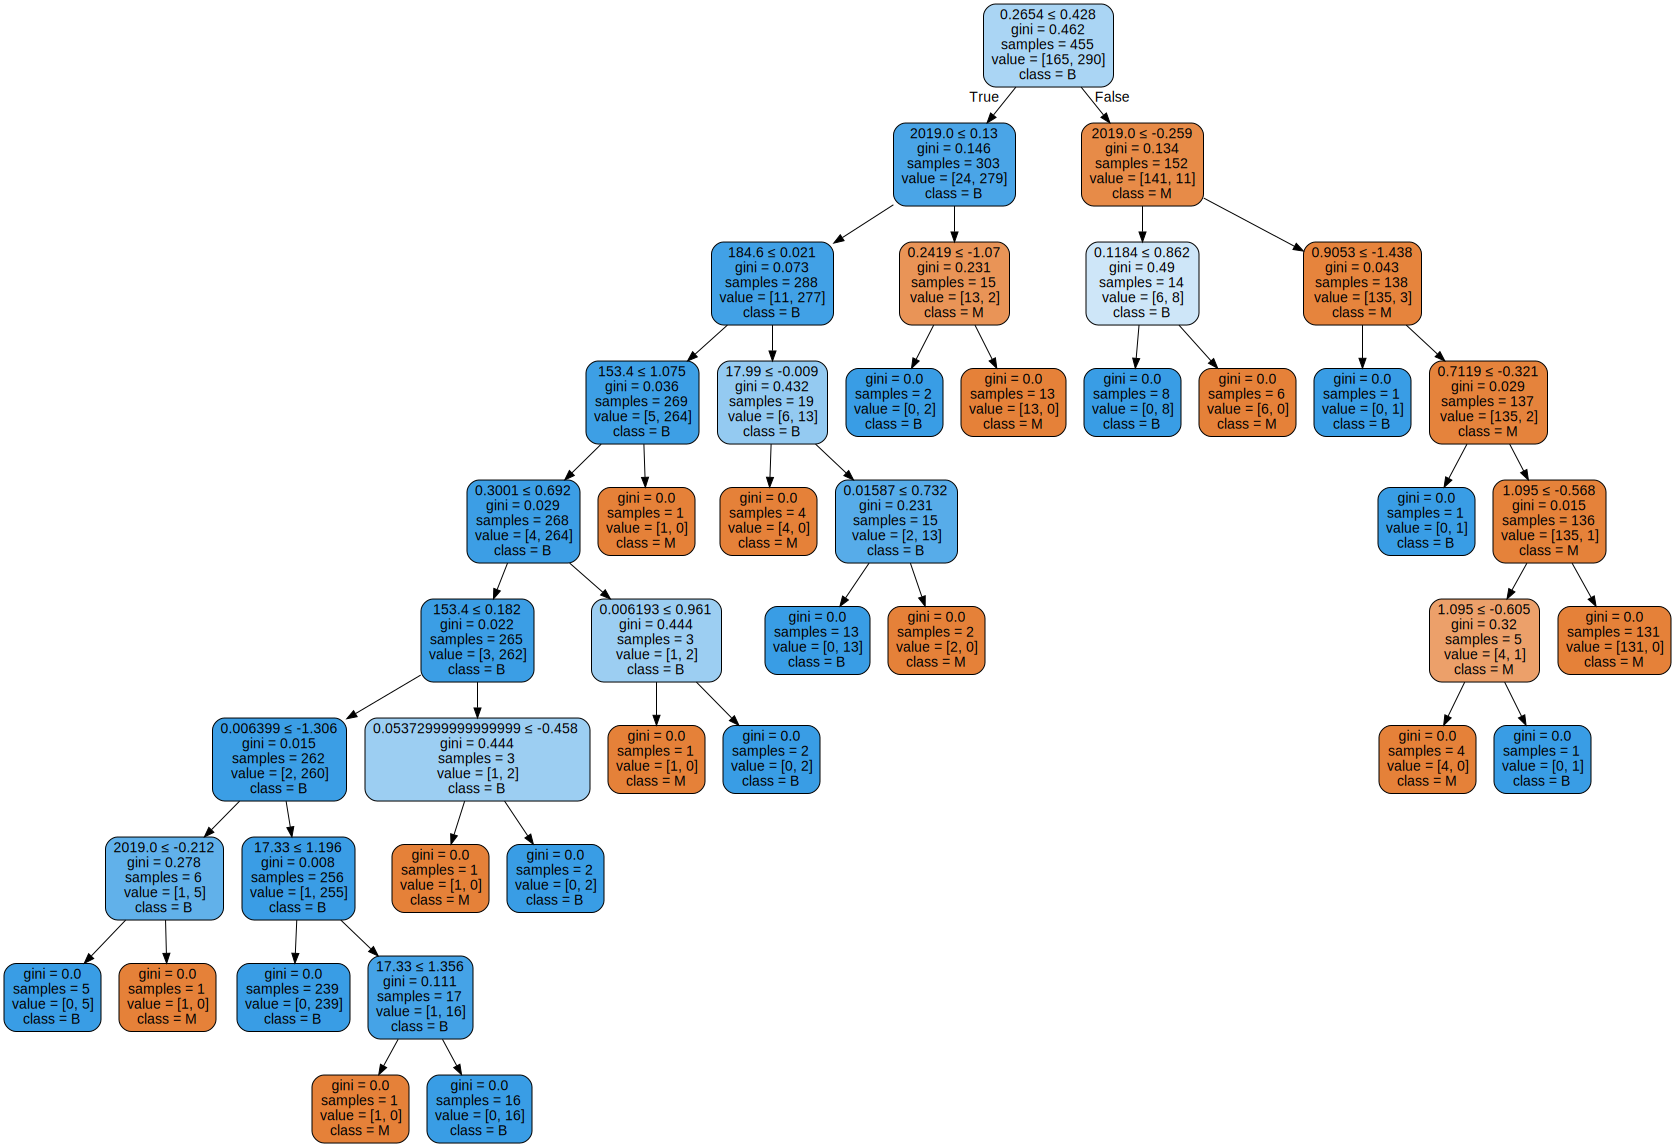

In [106]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Users/Alfa/Desktop/graphviz-2.38/release/bin'



#from sklearn.datasets import load_iris
from sklearn          import tree

#iris = load_iris()
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=df.iloc[0,2:32],  
                                class_names=('M','B'),  
                                filled=True, rounded=True,  
                                special_characters=True)  

import graphviz 
graph = graphviz.Source(dot_data)  

from IPython.display import display
display(graph)
